## Plots the mean activation for a specific layer given an input image

In [1]:
from fastai.conv_learner import *
from filter_visualizer import SaveFeatures

In [2]:
layer = 42
filter = 75  # will be marked with a vertical line in the plot
total_filters_in_layer = 512

In [3]:
picture = PIL.Image.open("test/examples/7_moth.jpg")

In [4]:
model = vgg16(pre=True).cuda().eval()
set_trainable(model, False)

In [5]:
sz = 224

In [6]:
train_tfms, val_tfms = tfms_from_model(vgg16, sz)

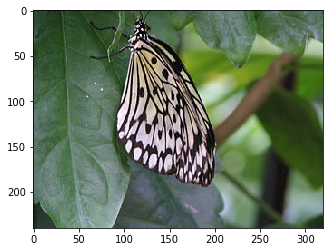

In [7]:
plt.imshow(picture)

In [8]:
transformed = val_tfms(np.array(picture)/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


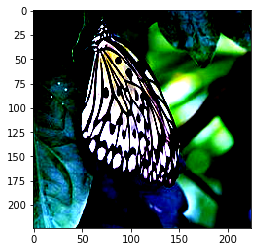

In [9]:
plt.imshow(transformed.transpose(1,2,0))

In [10]:
activations = SaveFeatures(list(model.children())[layer])

In [11]:
model(V(transformed)[None]);

In [12]:
mean_act = [activations.features[0,i].mean().item() for i in range(total_filters_in_layer)]

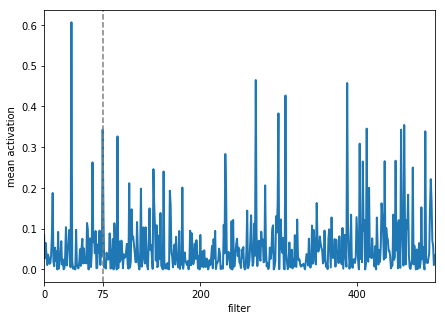

In [13]:
plt.figure(figsize=(7,5))
act = plt.plot(mean_act,linewidth=2.)
extraticks=[filter]
ax = act[0].axes
ax.set_xlim(0,500)
plt.axvline(x=filter, color='grey', linestyle='--')
ax.set_xlabel("filter")
ax.set_ylabel("mean activation")
ax.set_xticks([0,200,400] + extraticks)
#plt.show()
plt.savefig('mean_activation_layer_'+str(layer)+'_filter_'+str(filter)+'.png')

In [14]:
thresh = 0.4
[i for i in range(total_filters_in_layer) if mean_act[i]>thresh]

[35, 271, 309, 388]

In [15]:
activations.close()